In [1]:
import os 
from PIL import Image 
from arguments import parser 
import torch 
import torch.nn as nn 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from datasets import create_dataset 
from torch.utils.data import DataLoader
from utils.metrics import MetricCalculator, loco_auroc
from accelerate import Accelerator
from omegaconf import OmegaConf
import seaborn as sns 
from models import LANGCAD 
from main import load_caption
import open_clip 

os.environ['CUDA_VISIBLE_DEVICES'] = '0' 
default_setting = './configs/default/mvtecad.yaml'
model_setting = './configs/model/LANGCAD.yaml'
cfg = parser(True,default_setting, model_setting)


model  = __import__('models').__dict__[cfg.MODEL.method](
        backbone = cfg.MODEL.backbone,
        **cfg.MODEL.params
        )
device = 'cuda'

caption_dict = load_caption(
        datadir     = cfg.DATASET.datadir,
        dataset     = cfg.DATASET.dataset_name,
        class_names = cfg.DATASET.class_names
    )

loader_dict = {}
accelerator = Accelerator()
for cn in cfg.DATASET.class_names:
    trainset, testset = create_dataset(
        dataset_name  = cfg.DATASET.dataset_name,
        datadir       = cfg.DATASET.datadir,
        class_name    = cn,
        caption_dict  = caption_dict, 
        img_size      = cfg.DATASET.img_size,
        mean          = cfg.DATASET.mean,
        std           = cfg.DATASET.std,
        aug_info      = cfg.DATASET.aug_info,
        **cfg.DATASET.get('params',{})
    )
    trainloader = DataLoader(
        dataset     = trainset,
        batch_size  = cfg.DATASET.batch_size,
        num_workers = cfg.DATASET.num_workers,
        shuffle     = True 
    )    

    testloader = DataLoader(
            dataset     = testset,
            batch_size  = 8,
            num_workers = cfg.DATASET.num_workers,
            shuffle     = False 
        )    
    
    loader_dict[cn] = {'train':trainloader,'test':testloader}    


 Experiment Name : dm24_method3_601_1epoch_sr_0.05 



In [2]:
for idx, (images, positive, negative) in enumerate(trainloader):
    break 

In [9]:
self = model 
prompts = self.create_prompts()
visual_features = self._embed_img(images, prompts)
# visual_features = visual_features.mean(dim=1)@self.proj

In [10]:
visual_features.shape

torch.Size([128, 202, 768])

In [15]:
self = self.to('cuda')

In [16]:
pos_text_features = self._embed_text(positive)
# pos_text_features = pos_text_features.mean(dim=1)

In [18]:
pos_text_features.shape

torch.Size([128, 77, 512])

In [18]:
self = model.criterion 
logit_scale = 1/0.07 
image_features = visual_features 

text_features = torch.cat([pos_text_features,neg_text_features])
logits_per_image, logits_per_text = self.get_logits(image_features, text_features, logit_scale)
labels = self.get_ground_truth(device, logits_per_image.shape[0])

In [22]:
line

'2024-10-21 13:55:54,554 -                train: [    INFO] - Image AUROC: 0.907%| Pixel AUROC: 0.983%\n'

In [28]:
log_file = "/Volume/VAD/LifeLongerAD/results/LANGCAD/MVTecAD/kiie_method601_num_prompts6/seed_0/train.log"
with open(log_file,'r') as f: 
    data = f.readlines()

In [51]:
for line in [data[22]]:
    match = re.search(r"Loss: (\d+\.\d+)", line)
    epoch_match = re.search(r"Epoch: (\d+)/", line)
    print(match, epoch_match)

None None


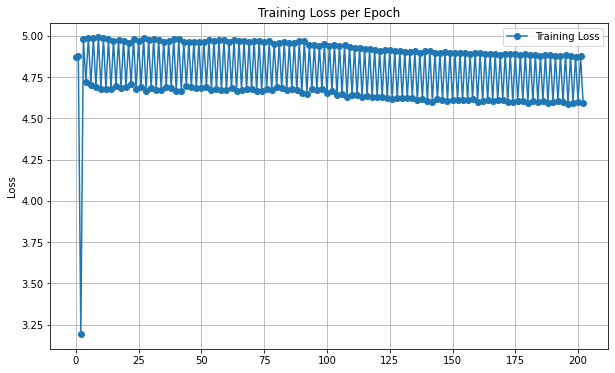

In [5]:
import re
import matplotlib.pyplot as plt

# 로그 데이터 샘플을 텍스트 파일로 저장했다고 가정하고 파일 이름을 지정합니다.
log_file = "/Volume/VAD/LifeLongerAD/results/LANGCAD/MVTecAD/kiie_method601_num_prompts6/seed_0/train.log"

# Loss 값을 저장할 리스트
loss_values = []
epochs = []

with open(log_file, 'r') as f: 
    data = f.readlines()[610:1120]
    
for line in data:
    match = re.search(r"Loss: (\d+\.\d+)", line)
    
    if match:
        loss = float(match.group(1))
        loss_values.append(loss)


# Loss 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(loss_values, marker='o', linestyle='-', label='Training Loss')
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.legend()
plt.grid()
plt.show()


(4.7, 4.9)

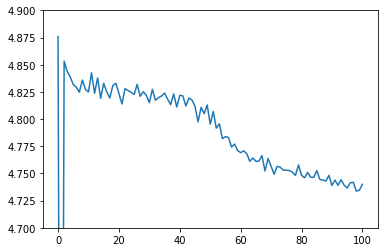

In [28]:
import pandas as pd 

len(loss_values)

import numpy as np 

i = 1
plt.plot(
    np.array([np.mean(np.array(loss_values)[2*i:2*i+2]) for i in range(int(len(loss_values)/2))])
    )

plt.ylim(4.7,4.9)